In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#Load the training and test data
X_train=np.load('/home/unipi/v.vichi3/Desktop/X_train.npy')
X_test=np.load('/home/unipi/v.vichi3/Desktop/X_test.npy')
y_train=np.load('/home/unipi/v.vichi3/Desktop/y_train.npy')
y_test=np.load('/home/unipi/v.vichi3/Desktop/y_test.npy')

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600000, 5) (52376, 5) (600000,) (52376,)


In [7]:
#The baseline model is the one that computes the mean of the target variable on the training set and returns, for 
#all instances in the test set, that mean
y_bar=y_train.mean()
print("Mean of the MOID over the training set:", y_bar)
#Compute the MSE and MAE
MSE=0
MAE=0
for i in range(len(y_test)):
    MSE += (y_test[i]-y_bar)**2
    MAE += abs(y_test[i]-y_bar)
MAE=MAE/len(y_test)
MSE=MSE/len(y_test)
print("MSE for test data:", MSE)
print("MAE for test data:", MAE)

Mean of the MOID over the training set: 0.18033655783333338
MSE for test data: 0.016517902853446634
MAE for test data: 0.1054009483071237


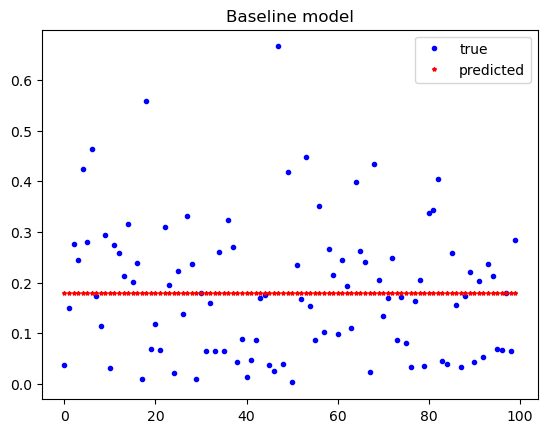

In [8]:
plt.plot(y_test[:100],'bo',markersize=3)
plt.plot(y_bar*np.ones((100,)), 'r*',markersize=3)
plt.legend(['true','predicted'],loc='upper right')
plt.title('Baseline model')
plt.show()

In [9]:
#Linear Regression
lin_reg=LinearRegression().fit(X_train,y_train)
r_sq=lin_reg.score(X_test,y_test)
print("R squared on test set:", r_sq)
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

R squared on test set: 0.1100957393030294
Intercept: 0.11164309822134315
Coefficients: [ 4.82630044e-02 -1.51712311e-01  1.93476860e-03  1.55072413e-06
  3.06501066e-06]


In [10]:
y_pred=lin_reg.intercept_+np.sum(lin_reg.coef_*X_test,axis=1)

In [11]:
MSE=0
MAE=0
for i in range(len(y_test)):
    MSE += (y_test[i]-y_pred[i])**2
    MAE += abs(y_test[i]-y_pred[i])
MAE=MAE/len(y_test)
MSE=MSE/len(y_test)
print("MSE for test data:", MSE)
print("MAE for test data:", MAE)

MSE for test data: 0.014699348657340645
MAE for test data: 0.09811802278034978


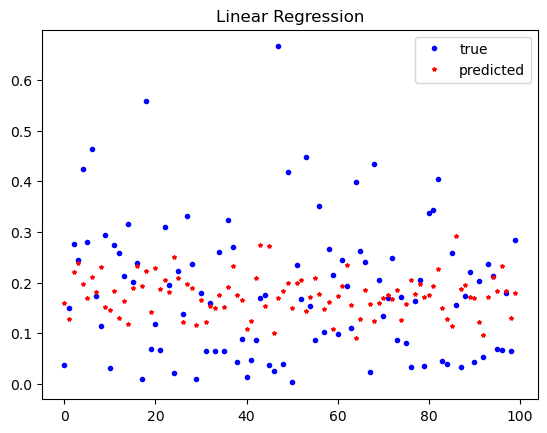

In [12]:
plt.plot(y_test[:100],'bo',markersize=3)
plt.plot(y_pred[:100], 'r*',markersize=3)
plt.legend(['true','predicted'],loc='upper right')
plt.title('Linear Regression')
plt.show()

In [13]:
#Polynomial Regression, d=2
X_train2=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_train)
X_test2=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_test)

In [14]:
pol_reg2=LinearRegression().fit(X_train2,y_train)
print("R squared on test set:", pol_reg2.score(X_test2,y_test))
print("Number of parameters:", len(pol_reg2.coef_)+1)
print("Intercept:", pol_reg2.intercept_)
print("Coefficients:", pol_reg2.coef_)

R squared on test set: 0.27590125893584405
Number of parameters: 21
Intercept: -0.06682331717498041
Coefficients: [ 2.64761936e-01 -3.68484985e-01  1.98222192e-03  3.49081805e-08
 -2.11007545e-05  5.18185781e-02 -6.50491717e-01 -8.39355649e-04
  3.53009628e-06 -1.87802540e-06  1.04755036e+00  8.00918631e-03
 -1.17843565e-05  1.49267806e-05 -3.71225082e-05 -7.21465016e-08
 -2.60640620e-08  9.40777227e-10  1.35524373e-08  4.81669732e-08]


In [15]:
y_pred2=pol_reg2.predict(X_test2)

In [16]:
MSE=0
MAE=0
for i in range(len(y_test)):
    MSE += (y_test[i]-y_pred2[i])**2
    MAE += abs(y_test[i]-y_pred2[i])
MAE=MAE/len(y_test)
MSE=MSE/len(y_test)
print("MSE for test data:", MSE)
print("MAE for test data:", MAE)

MSE for test data: 0.011960589837953305
MAE for test data: 0.08473643514764896


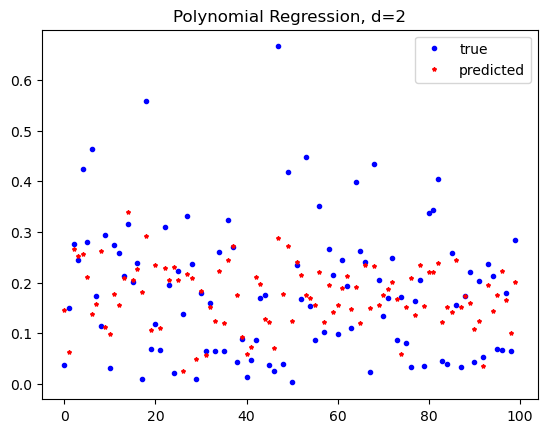

In [17]:
plt.plot(y_test[:100],'bo',markersize=3)
plt.plot(y_pred2[:100], 'r*',markersize=3)
plt.legend(['true','predicted'],loc='upper right')
plt.title('Polynomial Regression, d=2')
plt.show()

In [18]:
#Polynomial Regression, d=3
X_train3=PolynomialFeatures(degree=3,include_bias=False).fit_transform(X_train)
X_test3=PolynomialFeatures(degree=3,include_bias=False).fit_transform(X_test)

In [19]:
pol_reg3=LinearRegression().fit(X_train3,y_train)
print("R squared on test set:", pol_reg3.score(X_test3,y_test))
print("Number of parameters:", len(pol_reg3.coef_)+1)
print("Intercept:", pol_reg3.intercept_)
print("Coefficients:", pol_reg3.coef_)

R squared on test set: 0.408933403538129
Number of parameters: 56
Intercept: -0.0642778564287125
Coefficients: [-4.85030431e-01  2.35254231e+00  2.56156230e-03 -1.73008136e-04
  1.36437760e-04  6.12894758e-01 -2.20816518e+00 -1.05639652e-03
  2.00183667e-05  5.91435833e-04 -1.08031099e+00  8.96710234e-03
  4.86786144e-05 -2.75426884e-03 -5.23946253e-05  3.06615778e-07
  7.22203296e-07  3.07131064e-07  1.02830028e-06 -5.00502751e-07
  1.14320320e-02 -9.19801964e-01  1.26268262e-04  2.32567799e-06
  3.17366059e-06  4.04507073e+00 -1.47748622e-03 -2.59277724e-05
 -1.10312486e-05  9.63613516e-06  1.17647833e-07  1.74207575e-07
 -2.33445282e-08 -3.45841003e-08 -1.66442399e-06 -2.61561493e+00
  6.85840566e-03  2.45631773e-05 -3.37029852e-05 -9.50305201e-05
 -5.05909782e-07  5.99063352e-08 -7.11912397e-08 -3.32265493e-10
  7.80788118e-06  3.42736622e-07 -3.37940292e-09 -4.19296109e-09
  5.19863930e-10 -1.59982882e-09 -1.38488071e-09  2.34894881e-11
 -1.37425749e-09 -1.11708820e-09 -4.76537004

In [20]:
y_pred3=pol_reg3.predict(X_test3)

In [21]:
MSE=0
MAE=0
for i in range(len(y_test)):
    MSE += (y_test[i]-y_pred3[i])**2
    MAE += abs(y_test[i]-y_pred3[i])
MAE=MAE/len(y_test)
MSE=MSE/len(y_test)
print("MSE for test data:", MSE)
print("MAE for test data:", MAE)

MSE for test data: 0.009763178315716749
MAE for test data: 0.07445845502584257


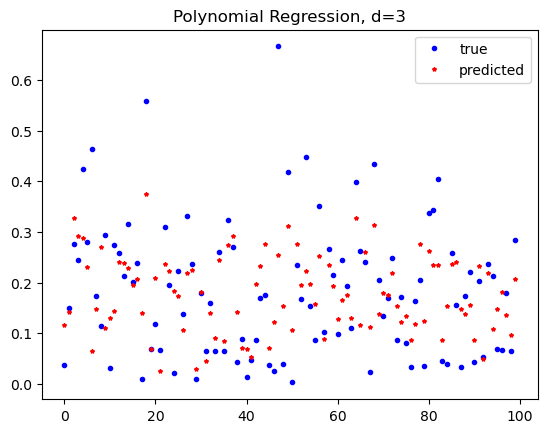

In [22]:
plt.plot(y_test[:100],'bo',markersize=3)
plt.plot(y_pred3[:100], 'r*',markersize=3)
plt.legend(['true','predicted'],loc='upper right')
plt.title('Polynomial Regression, d=3')
plt.show()